In [1]:
import os
import umap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.text import Text
import seaborn as sns; sns.set_style("white")
import umap.plot
%matplotlib inline
os.getcwd()

'/Users/chririn/Documents/Code/2D_analysis_v2'

In [2]:
BaseDir = "./results/"


In [9]:
# Import feature data after QC
selected_df = pd.read_csv("{}colopaint44_selected_data_notMAD.csv".format(BaseDir), sep=";", index_col=0)
ListOfMetadata = list(selected_df.columns[selected_df.columns.str.contains("Metadata_")])
selected_df.head(1)
df_toplot = selected_df

In [10]:
# df_toplot['Metadata_cmpd_conc'].loc[(df_toplot['Metadata_cmpd'] == '[dmso]')] = 0.0001
training_data = df_toplot.drop(ListOfMetadata, axis=1).to_numpy()

Text(0.5, 1.0, 'All concentrations')

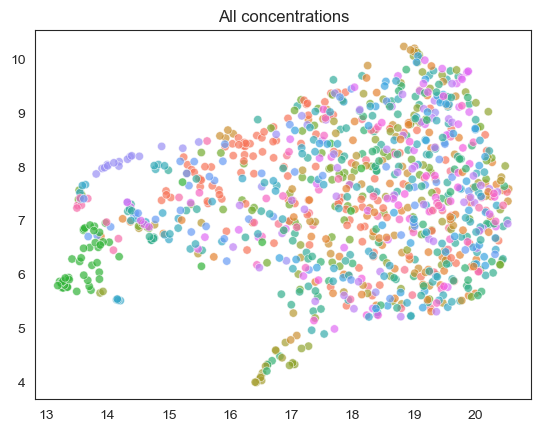

In [11]:
## UMAP

reducer = umap.UMAP(n_components=2, n_neighbors=15, min_dist= 0.1, random_state=42)
embedding = reducer.fit_transform(training_data)

fig = plt.figure()
ax = sns.scatterplot(
    x=embedding[:, 0],
    y=embedding[:, 1],
    hue=df_toplot.Metadata_moa,
    alpha=(0.7),
    marker="o",
    #size=df_toplot["Metadata_cmpd_conc"],
    #palette=pal,
    legend=False
    )

plt.title('All concentrations')

Text(0.5, 1.0, 'All concentrations')

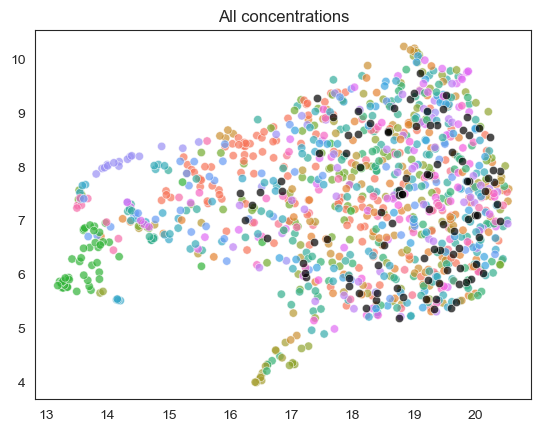

In [6]:
## UMAP

reducer = umap.UMAP(n_components=2, n_neighbors=15, min_dist= 0.1, random_state=42)
embedding = reducer.fit_transform(training_data)

fig = plt.figure()
ax = sns.scatterplot(
    x=embedding[:, 0],
    y=embedding[:, 1],
    hue=df_toplot.Metadata_moa,
    alpha=(0.7),
    marker="o",
    #size=df_toplot["Metadata_cmpd_conc"],
    #palette=pal,
    legend=False
    )

ax = sns.scatterplot(
    x=embedding[df_toplot['Metadata_pert_type'] == 'negcon', 0],
    y=embedding[df_toplot['Metadata_pert_type'] == 'negcon', 1],
    c='black',
    alpha=(0.7),
    marker="o",
    #palette=pal,
    legend=False
    )

plt.title('All concentrations')

#### Trace back to which well

In [12]:
ListOfMetadata2 = ['Metadata_cmpd','Metadata_plate_well','Metadata_cmpd_conc', 'Metadata_moa', 'Metadata_class', 'Metadata_clinical_status']


In [13]:
hover_data = df_toplot[ListOfMetadata2]
umap.plot.output_notebook()
p = umap.plot.interactive(reducer, labels=df_toplot['Metadata_cmpd'], hover_data=hover_data, point_size=4, alpha = 1)
umap.plot.show(p)

Loading BokehJS ...